# Analysis of Gremlin cart-pole runs

Or where we generate plots to put in the paper after doing some reality checks on the results.

In [34]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.stats import wilcoxon

sns.set_theme() # default Seaborn theme

from analytics import consolidate_csv_as_df, consolidate_learner_csv_as_df

### Load up the "unsweetened" data.


First consolidate all the Gremlin population (by-generation) CSVs into a single data frame

In [4]:
gremlin_unsweetened_runs = consolidate_csv_as_df(Path('nonsweet_output').glob('*inds.csv'), infer_run=True)

reading nonsweet_output/5_10_inds.csv
Adding run number 5
Adding iteration number 10
New dataframe length 2000
reading nonsweet_output/5_11_inds.csv
Adding run number 5
Adding iteration number 11
New dataframe length 2000
reading nonsweet_output/0_4_inds.csv
Adding run number 0
Adding iteration number 4
New dataframe length 2000
reading nonsweet_output/0_5_inds.csv
Adding run number 0
Adding iteration number 5
New dataframe length 2000
reading nonsweet_output/4_12_inds.csv
Adding run number 4
Adding iteration number 12
New dataframe length 2000
reading nonsweet_output/4_13_inds.csv
Adding run number 4
Adding iteration number 13
New dataframe length 2000
reading nonsweet_output/7_8_inds.csv
Adding run number 7
Adding iteration number 8
New dataframe length 2000
reading nonsweet_output/7_9_inds.csv
Adding run number 7
Adding iteration number 9
New dataframe length 2000
reading nonsweet_output/6_1_inds.csv
Adding run number 6
Adding iteration number 1
New dataframe length 2000
reading non

Adding run number 0
Adding iteration number 8
New dataframe length 2000
reading nonsweet_output/1_1_inds.csv
Adding run number 1
Adding iteration number 1
New dataframe length 2000
reading nonsweet_output/7_12_inds.csv
Adding run number 7
Adding iteration number 12
New dataframe length 2000
reading nonsweet_output/7_13_inds.csv
Adding run number 7
Adding iteration number 13
New dataframe length 2000
reading nonsweet_output/7_5_inds.csv
Adding run number 7
Adding iteration number 5
New dataframe length 2000
reading nonsweet_output/7_4_inds.csv
Adding run number 7
Adding iteration number 4
New dataframe length 2000
reading nonsweet_output/6_10_inds.csv
Adding run number 6
Adding iteration number 10
New dataframe length 2000
reading nonsweet_output/6_11_inds.csv
Adding run number 6
Adding iteration number 11
New dataframe length 2000
reading nonsweet_output/5_7_inds.csv
Adding run number 5
Adding iteration number 7
New dataframe length 2000
reading nonsweet_output/5_6_inds.csv
Adding run 

Adding run number 9
Adding iteration number 14
New dataframe length 2000
reading nonsweet_output/9_8_inds.csv
Adding run number 9
Adding iteration number 8
New dataframe length 2000
reading nonsweet_output/9_9_inds.csv
Adding run number 9
Adding iteration number 9
New dataframe length 2000
reading nonsweet_output/3_13_inds.csv
Adding run number 3
Adding iteration number 13
New dataframe length 2000
reading nonsweet_output/3_12_inds.csv
Adding run number 3
Adding iteration number 12
New dataframe length 2000
reading nonsweet_output/8_17_inds.csv
Adding run number 8
Adding iteration number 17
New dataframe length 2000
reading nonsweet_output/2_6_inds.csv
Adding run number 2
Adding iteration number 6
New dataframe length 2000
reading nonsweet_output/8_16_inds.csv
Adding run number 8
Adding iteration number 16
New dataframe length 2000
reading nonsweet_output/2_7_inds.csv
Adding run number 2
Adding iteration number 7
New dataframe length 2000


Add type column for unsweetened.

In [5]:
gremlin_unsweetened_runs['type'] = 'nosweet'

### Now do the same for the SWEET runs

In [6]:
gremlin_sweetened_runs = consolidate_csv_as_df(Path('sweet_output').glob('*inds.csv'), infer_run=True)

reading sweet_output/5_10_inds.csv
Adding run number 5
Adding iteration number 10
New dataframe length 2000
reading sweet_output/5_11_inds.csv
Adding run number 5
Adding iteration number 11
New dataframe length 2000
reading sweet_output/0_4_inds.csv
Adding run number 0
Adding iteration number 4
New dataframe length 2000
reading sweet_output/0_5_inds.csv
Adding run number 0
Adding iteration number 5
New dataframe length 2000
reading sweet_output/4_12_inds.csv
Adding run number 4
Adding iteration number 12
New dataframe length 2000
reading sweet_output/4_13_inds.csv
Adding run number 4
Adding iteration number 13
New dataframe length 2000
reading sweet_output/7_8_inds.csv
Adding run number 7
Adding iteration number 8
New dataframe length 2000
reading sweet_output/7_9_inds.csv
Adding run number 7
Adding iteration number 9
New dataframe length 2000
reading sweet_output/6_1_inds.csv
Adding run number 6
Adding iteration number 1
New dataframe length 2000
reading sweet_output/1_6_inds.csv
Addi

Adding run number 8
Adding iteration number 6
New dataframe length 2000
reading sweet_output/3_14_inds.csv
Adding run number 3
Adding iteration number 14
New dataframe length 2000
reading sweet_output/3_15_inds.csv
Adding run number 3
Adding iteration number 15
New dataframe length 2000
reading sweet_output/3_9_inds.csv
Adding run number 3
Adding iteration number 9
New dataframe length 2000
reading sweet_output/3_8_inds.csv
Adding run number 3
Adding iteration number 8
New dataframe length 2000
reading sweet_output/8_10_inds.csv
Adding run number 8
Adding iteration number 10
New dataframe length 2000
reading sweet_output/2_1_inds.csv
Adding run number 2
Adding iteration number 1
New dataframe length 2000
reading sweet_output/8_11_inds.csv
Adding run number 8
Adding iteration number 11
New dataframe length 2000
reading sweet_output/1_5_inds.csv
Adding run number 1
Adding iteration number 5
New dataframe length 2000
reading sweet_output/1_4_inds.csv
Adding run number 1
Adding iteration n

In [10]:
gremlin_sweetened_runs['type'] = 'sweet'

### Consolidate into a single data frame

In [ ]:
gremlin_runs = pd.concat([gremlin_unsweetened_runs, gremlin_sweetened_runs])

In [ ]:
# the indices are going to be all screwed up, so reindex the lot
gremlin_runs.reset_index(drop=False, inplace=True)

In [ ]:
gremlin_runs

In [14]:
gremlin_runs.type.value_counts()  # reality check; these should be the same

sweet      340000
nosweet    340000
Name: type, dtype: int64

In [14]:
# Check that we got all the iterations because there used to be a regex bug

gremlin_runs.iteration.unique()

array([10, 11,  4,  5, 12, 13,  8,  9,  1,  6,  7, 15, 14,  2,  3, 17, 16])

In [15]:
gremlin_runs.groupby(['type','run']).iteration.value_counts()

type     run  iteration
nosweet  0    1            2000
              2            2000
              3            2000
              4            2000
              5            2000
                           ... 
sweet    9    13           2000
              14           2000
              15           2000
              16           2000
              17           2000
Name: iteration, Length: 340, dtype: int64

Convert start and stop evaluation times to actual time objects.

In [18]:
gremlin_runs['start_eval_time'] = pd.to_datetime(gremlin_runs.start_eval_time, unit='s')
gremlin_runs['stop_eval_time'] = pd.to_datetime(gremlin_runs.stop_eval_time, unit='s')

In [19]:
gremlin_runs['eval_duration'] = gremlin_runs.stop_eval_time - gremlin_runs.start_eval_time

In [20]:
gremlin_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680000 entries, 0 to 679999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   index                680000 non-null  int64          
 1   birth_id             680000 non-null  int64          
 2   position             680000 non-null  float64        
 3   velocity             680000 non-null  float64        
 4   angle                680000 non-null  float64        
 5   rotational_velocity  680000 non-null  float64        
 6   start_eval_time      680000 non-null  datetime64[ns] 
 7   stop_eval_time       680000 non-null  datetime64[ns] 
 8   fitness              680000 non-null  float64        
 9   run                  680000 non-null  int64          
 10  iteration            680000 non-null  int64          
 11  type                 680000 non-null  object         
 12  eval_duration        680000 non-null  timedelta64[ns]
dtyp

In [36]:
gremlin_runs.groupby(['type','run','iteration']).start_eval_time.agg(['min','max']) # just quick check of times

min  \
type    run iteration                                 
nosweet 0   1         2022-03-04 14:53:33.161555968   
            2         2022-03-04 14:54:27.747643904   
            3         2022-03-04 14:55:35.863249920   
            4         2022-03-04 14:56:33.169689088   
            5         2022-03-04 14:57:31.680497920   
...                                             ...   
sweet   9   5         2022-03-04 23:14:14.440413952   
            6         2022-03-04 23:15:01.896112128   
            7         2022-03-04 23:15:48.732134144   
            8         2022-03-04 23:16:36.288556032   
            9         2022-03-04 23:17:24.824696064   

                                                max  
type    run iteration                                
nosweet 0   1         2022-03-04 15:10:27.931503104  
            2         2022-03-04 14:55:20.364892928  
            3         2022-03-04 14:56:12.303767040  
            4         2022-03-04 14:57:12.403845120  
            5         2022-03-04 14:58:04.616680960  
...                                             ...  
sweet   9   5         2022-03-04 23:14:46.934275072  
            6         2022-03-04 23:15:33.559688960  
            7         2022-03-04 23:16:20.894109952  
            8         2022-03-04 23:17:08.263814912  
            9         2022-03-04 23:17:57.473961984  

[180 rows x 2 columns]

In [23]:
gremlin_runs['best_so_far_by_iteration'] = gremlin_runs.groupby(['run','iteration']).fitness.cummin()

In [24]:
gremlin_runs['best_so_far_by_iteration']

0         22.0
1         22.0
2         22.0
3         22.0
4         22.0
          ... 
679995     8.0
679996     8.0
679997     8.0
679998     8.0
679999     8.0
Name: best_so_far_by_iteration, Length: 680000, dtype: float64

In [ ]:
gremlin_runs # Checking final state of dataframe before visualizations

## Visualizations

Now let's just compare SWEET vs. non-SWEET for all runs with overlapping generations since the iterations are essentially restarts.

<IPython.core.display.Javascript object>


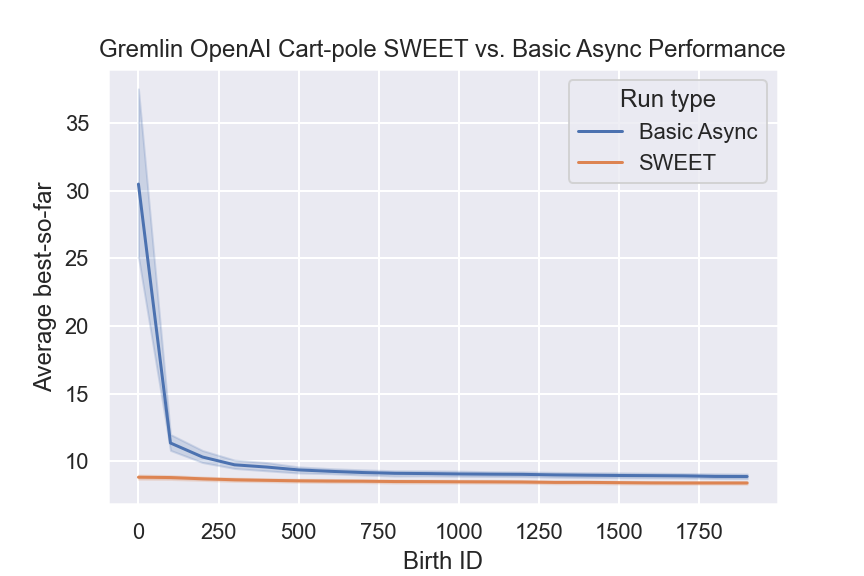

In [35]:
full_comparison = sns.lineplot(data=gremlin_runs[(gremlin_runs.birth_id % 100 == 0)],
                           x='birth_id',
                           y='best_so_far_by_iteration',
                           hue=gremlin_runs.type,
                           ci=95).set(title='Gremlin OpenAI Cart-pole SWEET vs. Basic Async Performance',
                                     xlabel='Birth ID', ylabel='Average best-so-far')

In [38]:
plt.legend(title='Run type', labels=['Basic Async','SWEET'])

In [39]:
plt.savefig('gremlin_sweet_vs_nonsweet.png')

In [40]:
plt.savefig('gremlin_sweet_vs_nonsweet.pdf')

Let's see if our claim that fitness is correlated with eval times.

In [42]:
gremlin_runs['eval_duration_secs'] = gremlin_runs.eval_duration.apply(lambda x: x.total_seconds())

<IPython.core.display.Javascript object>


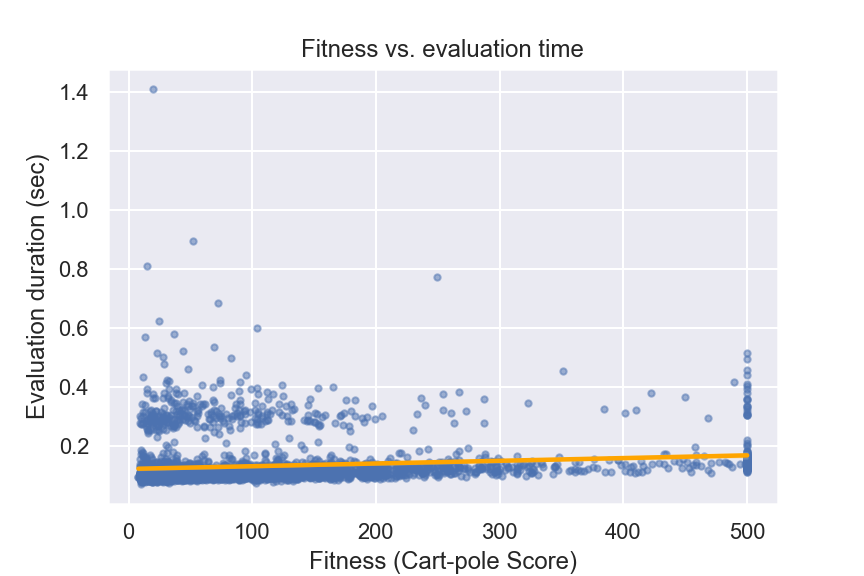

In [51]:
duration_vs_fitness_lm = sns.regplot(data=gremlin_runs[gremlin_runs.birth_id % 200 == 0],
                                    x='fitness',
                                    y='eval_duration_secs',
                                    scatter_kws={'s':10, 'alpha':.5},
                                    line_kws={'color':'orange'},
                                    ).set(title='Fitness vs. evaluation time',
                                          xlabel='Fitness (Cart-pole Score)', ylabel='Evaluation duration (sec)')

In [52]:
plt.savefig('gremlin_fitness_vs_eval_duration.png')

In [53]:
plt.savefig('gremlin_fitness_vs_eval_duration.pdf')

<IPython.core.display.Javascript object>


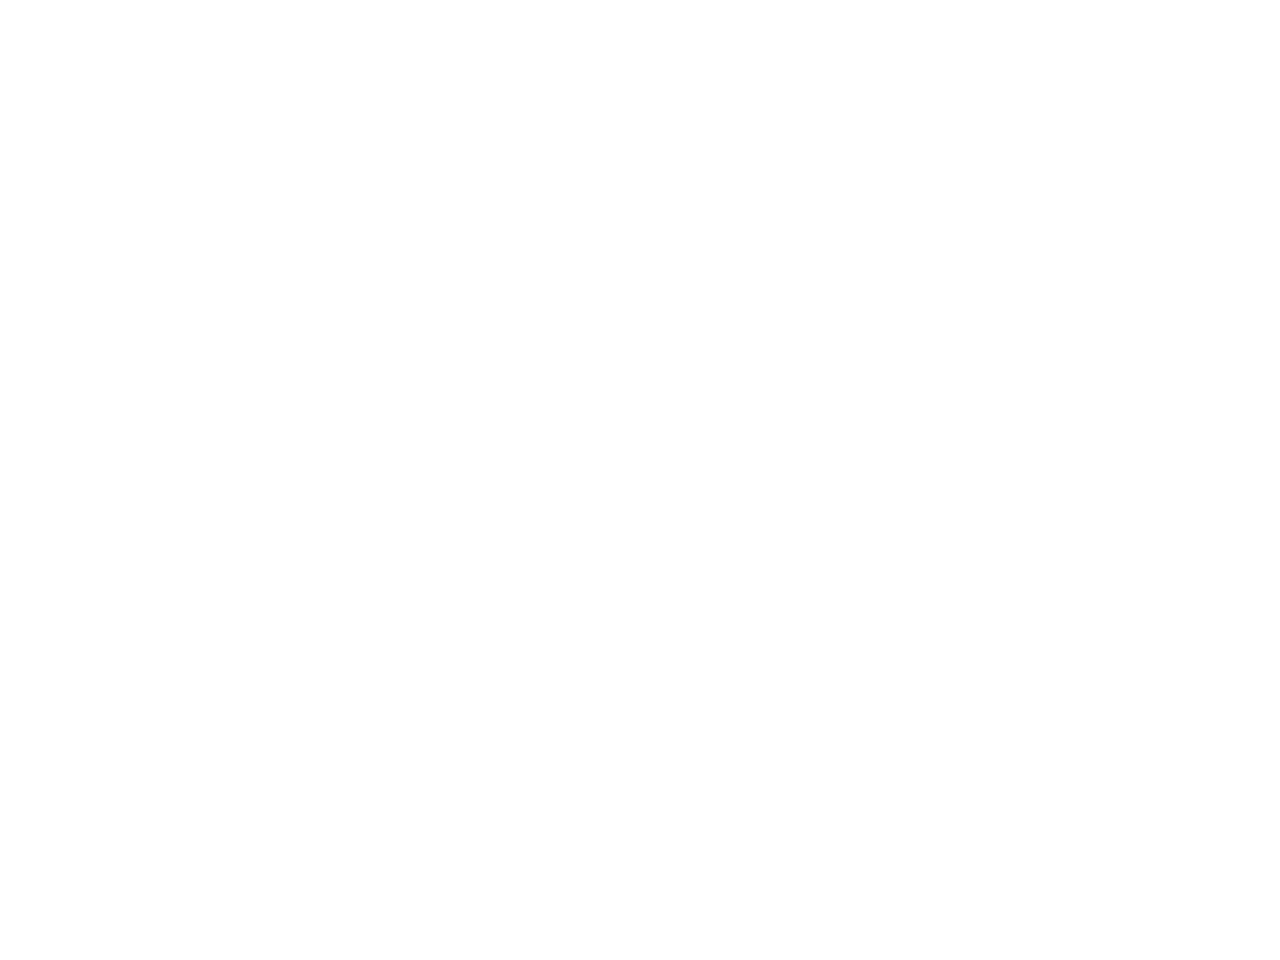

In [92]:
plt.clf()


We use the R s
